In [103]:
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True)
print(X.shape)

(150, 4)


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [121]:
iris=load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['CLASS']= iris.target

In [122]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [123]:
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte, = train_test_split(iris.data, df['CLASS'], test_size=0.2, random_state=0)

In [124]:
from sklearn import linear_model

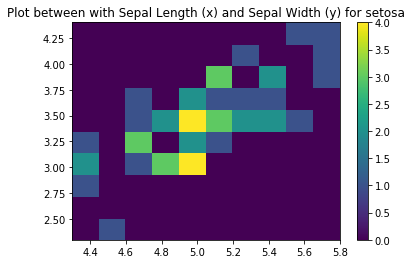

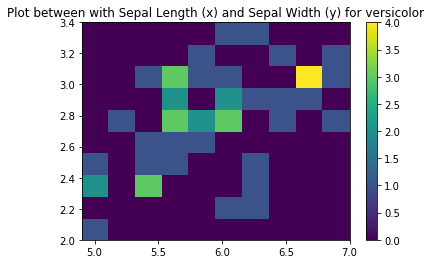

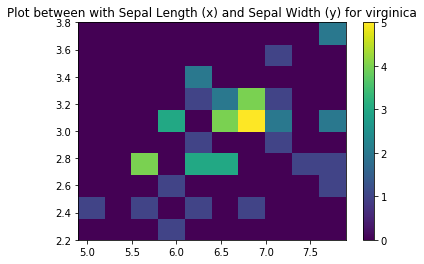

In [128]:
plt.title("Plot between with Sepal Length (x) and Sepal Width (y) for setosa")
plt.hist2d(df[df['CLASS']==0]['sepal length (cm)'],df[df['CLASS']==0]['sepal width (cm)'],bins=10)
a=plt.colorbar()
plt.show()
plt.title("Plot between with Sepal Length (x) and Sepal Width (y) for versicolor")
plt.hist2d(df[df['CLASS']==1]['sepal length (cm)'],df[df['CLASS']==1]['sepal width (cm)'],bins=10)
a=plt.colorbar()
plt.show()
plt.title("Plot between with Sepal Length (x) and Sepal Width (y) for virginica" )
plt.hist2d(df[df['CLASS']==2]['sepal length (cm)'],df[df['CLASS']==2]['sepal width (cm)'],bins=10)
a=plt.colorbar()

plt.show()

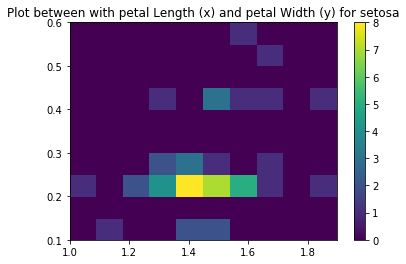

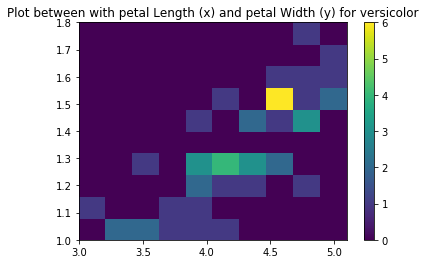

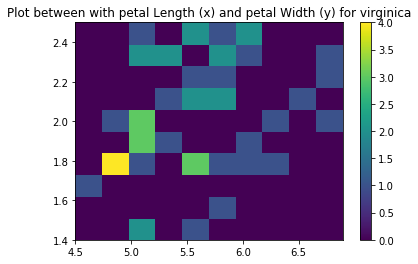

In [151]:
plt.title("Plot between with petal Length (x) and petal Width (y) for setosa")
plt.hist2d(df[df['CLASS']==0]['petal length (cm)'],df[df['CLASS']==0]['petal width (cm)'],bins=10)
a=plt.colorbar()
plt.show()
plt.title("Plot between with petal Length (x) and petal Width (y) for versicolor")
plt.hist2d(df[df['CLASS']==1]['petal length (cm)'],df[df['CLASS']==1]['petal width (cm)'],bins=10)
a=plt.colorbar()
plt.show()
plt.title("Plot between with petal Length (x) and petal Width (y) for virginica" )
plt.hist2d(df[df['CLASS']==2]['petal length (cm)'],df[df['CLASS']==2]['petal width (cm)'],bins=10)
a=plt.colorbar()

plt.show()

In [109]:
index= np.arange(150)

Text(0.5, 1.0, 'Classification on basis of sepal width')

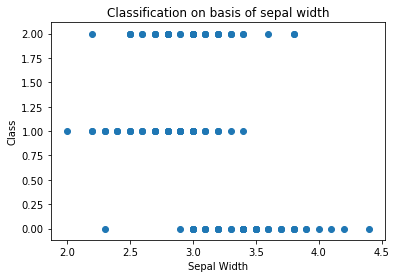

In [42]:
plt.scatter(X[:,1],y)
plt.ylabel("Class")
plt.xlabel("Sepal Width")
plt.title("Classification on basis of sepal width")

Text(0.5, 1.0, 'Classification on basis of sepal length')

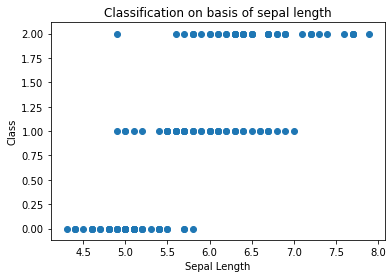

In [43]:
plt.scatter(X[:,0],y)
plt.ylabel("Class")
plt.xlabel("Sepal Length")
plt.title("Classification on basis of sepal length")

Text(0.5, 1.0, 'Classification on basis of Petal Length')

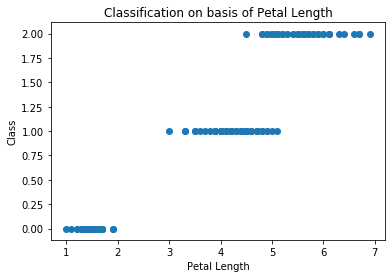

In [44]:
plt.scatter(X[:,2],y)
plt.ylabel("Class")
plt.xlabel("Petal Length")
plt.title("Classification on basis of Petal Length")

Text(0.5, 1.0, 'Classification on basis of Petal Width')

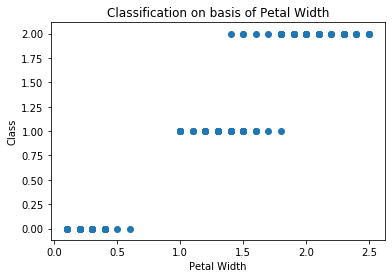

In [50]:
plt.scatter(X[:,3],y)
plt.ylabel("Class")
plt.xlabel("Petal Width")
plt.title("Classification on basis of Petal Width")

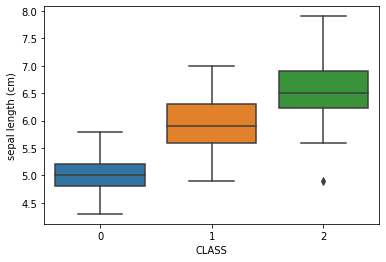

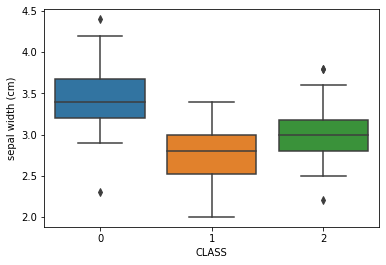

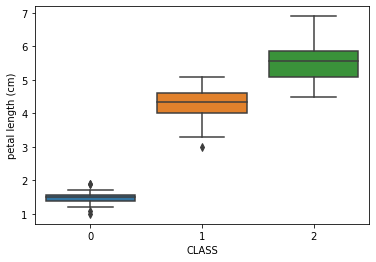

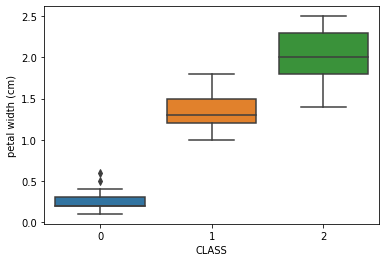

In [150]:
import seaborn as sb
for i in df.columns[:-1]:
  sb.boxplot(x='CLASS',y=i,data=df)
  plt.show()

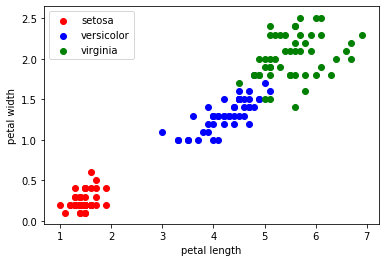

In [154]:
#plt.figure(figsize=(10,5))
names=['setosa','versicolor','virginia']
# plt.title("Scatter plot between with Petal Length (x) and Petal Width (y).")
plt.scatter(df[df['CLASS']==0]['petal length (cm)'],df[df['CLASS']==0]['petal width (cm)'],c='red')
plt.scatter(df[df['CLASS']==1]['petal length (cm)'],df[df['CLASS']==1]['petal width (cm)'],c='blue')
plt.scatter(df[df['CLASS']==2]['petal length (cm)'],df[df['CLASS']==2]['petal width (cm)'],c='green')
plt.legend(names)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold,cross_val_predict
X=df.drop(columns=['CLASS'],axis=1)
y=df['CLASS']
splits = StratifiedKFold(n_splits=5,random_state=55,shuffle=True)
splits.get_n_splits(X, y)
av=0

In [166]:
tar_names=['setosa','versicolor','virginica']
for train_index, test_index in splits.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier=GaussianNB()
    classifier.fit(X_train,y_train)
    print(confusion_matrix(classifier.predict(X_test),y_test))
    #sb.heatmap(df_cm, annot=True, annot_kws={"size": 14})
    print(classification_report(y_test,classifier.predict(X_test),target_names=tar_names))
    plt.show()

[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor      

In [10]:
ypred= gnb.predict(Xte)

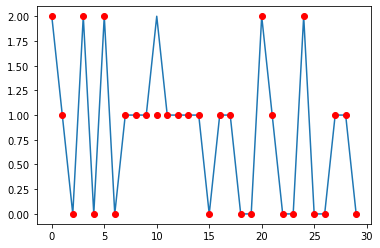

In [18]:
plt.plot(Yte)
plt.plot(ypred,'ro')

In [19]:
from sklearn.linear_model import LogisticRegression

In [36]:
logr = LogisticRegression(random_state=0,solver='liblinear',multi_class='auto')
logr.fit(X,y)
Ypred = logr.predict(Xtr)

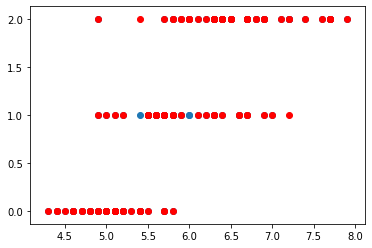

In [48]:
plt.plot(Xtr[:,0],Ypred,'ro')
plt.scatter(Xtr[:,0],Ytr)


## Logistic reg.

In [167]:
av=0
for train_index, test_index in splits.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier=LogisticRegression().fit(X_train, y_train)
    classifier.fit(X_train,y_train)
    print(confusion_matrix(classifier.predict(X_test),y_test))
    plt.show()
    print(classification_report(y_test,classifier.predict(X_test),target_names=tar_names))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  6  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor      

G:\Anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
G:\Anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
G:\Anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

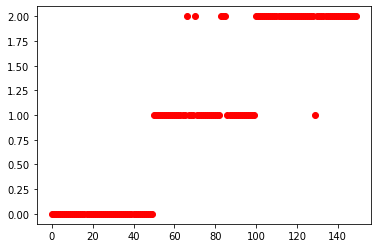

In [31]:
plt.plot(Ypred,'ro')

# K-Means

In [91]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random')
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [92]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

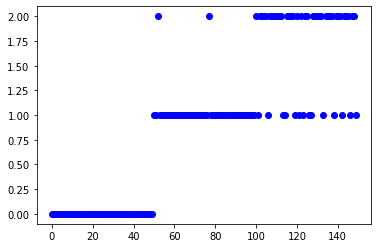

In [93]:
plt.plot(km.labels_,'bo')


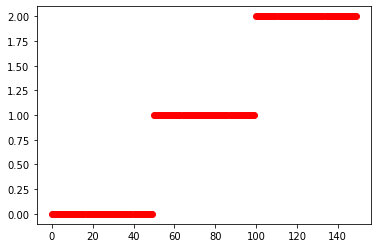

In [94]:
plt.plot(y,'ro')

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [102]:
print(confusion_matrix(y,km.labels_))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [101]:
print(classification_report(y,km.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## k-means

In [179]:
kmeans=KMeans(n_clusters=3,random_state=10).fit(X)
y_classifier=kmeans.labels_

print(confusion_matrix(y_classifier,y))
 
print(classification_report(y,y_classifier,target_names=tar_names))
misclassified=np.where(y!=y_classifier)
plt.show()


[[50  0  0]
 [ 0 48 14]
 [ 0  2 36]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

